In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
#from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

2024-02-26 19:15:14.533379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 19:15:14.533491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 19:15:14.691359: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dftrain = pd.read_csv('../input/HAM10000_metadata')

In [4]:
# Set paths to image folders
train_image_folder = '../input/ham10k resized/ham10k resized/'

In [5]:
 #Function to load images and map them to metadata
def load_images_and_map_to_metadata(df, image_folder):
    image_data = []
    labels = []
    for index, row in df.iterrows():
        image_id = row['image_id'] + '.jpg'
        image_path = os.path.join(image_folder, image_id)
        if os.path.exists(image_path):
            image = Image.open(image_path)
            image_data.append(np.array(image))
            labels.append(row['dx'])
    return np.array(image_data), np.array(labels)

In [6]:
X,y = load_images_and_map_to_metadata(dftrain, train_image_folder)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode y_train
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))

# One-hot encode y_test
y_test = encoder.transform(y_test.reshape(-1, 1))


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint


In [9]:
import tensorflow as tf

# Now check for GPU devices
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [10]:
base_model = EfficientNetB4(include_top=False, weights='imagenet', input_shape=(400,400, 3))

model = Sequential([

    base_model,

    GlobalAveragePooling2D(),

    Dense(7, activation='softmax')

])

from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Train the model with the checkpoint callback
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=8,
                    validation_data=(X_val, y_val),
                    )


71686520/71686520 [==============================] - 0s 0us/step
Epoch 1/50


2024-02-26 19:17:19.248662: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb4/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708975047.292075      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


902/902 [==============================] - 582s 559ms/step - loss: 0.8352 - accuracy: 0.7078 - val_loss: 0.7648 - val_accuracy: 0.7244
Epoch 2/50
902/902 [==============================] - 499s 553ms/step - loss: 0.6484 - accuracy: 0.7673 - val_loss: 0.7635 - val_accuracy: 0.7282
Epoch 3/50
902/902 [==============================] - 499s 553ms/step - loss: 0.5502 - accuracy: 0.7983 - val_loss: 0.5606 - val_accuracy: 0.8017
Epoch 4/50
902/902 [==============================] - 499s 553ms/step - loss: 0.4927 - accuracy: 0.8245 - val_loss: 0.5878 - val_accuracy: 0.7980
Epoch 5/50
902/902 [==============================] - 498s 552ms/step - loss: 0.4226 - accuracy: 0.8463 - val_loss: 0.7060 - val_accuracy: 0.8042
Epoch 6/50
902/902 [==============================] - 498s 552ms/step - loss: 0.3510 - accuracy: 0.8716 - val_loss: 1.0543 - val_accuracy: 0.7531
Epoch 7/50
902/902 [==============================] - 498s 553ms/step - loss: 0.3052 - accuracy: 0.8900 - val_loss: 0.5280 - val_accura

In [11]:
# Step 3: Evaluate the Model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)



63/63 [==============================] - 38s 487ms/step


In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_test_labels, y_pred_labels)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.70      0.51      0.59        69
           1       0.74      0.58      0.65        93
           2       0.64      0.65      0.64       228
           3       0.57      0.29      0.38        28
           4       0.64      0.37      0.47       226
           5       0.87      0.96      0.91      1338
           6       0.80      0.95      0.87        21

    accuracy                           0.81      2003
   macro avg       0.71      0.61      0.64      2003
weighted avg       0.80      0.81      0.80      2003



In [13]:
import numpy as np

# Get raw predictions
raw_predictions = model.predict(X_test)

# Convert raw predictions to probabilities using softmax function
y_pred_probs = np.exp(raw_predictions) / np.sum(np.exp(raw_predictions), axis=1, keepdims=True)


63/63 [==============================] - 27s 436ms/step


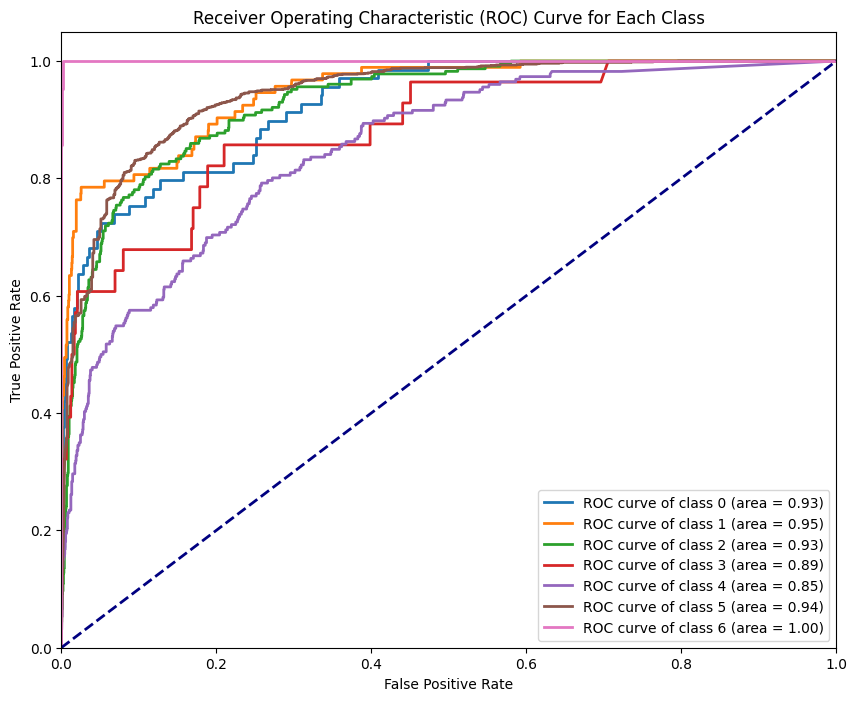

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_probs contains the predicted probabilities for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_labels == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(7):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


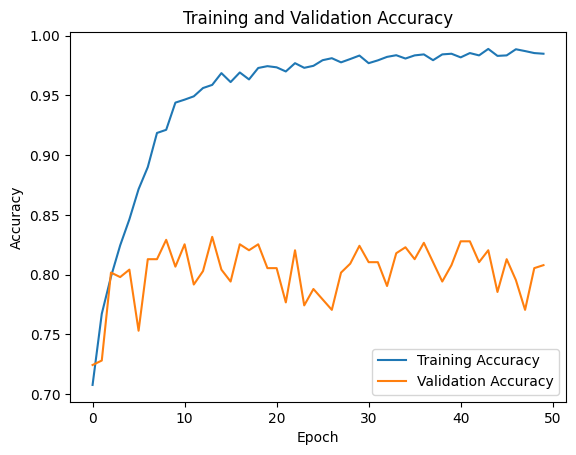

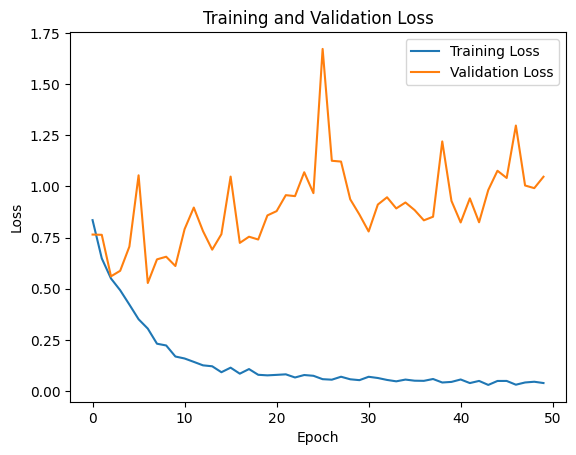

In [15]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

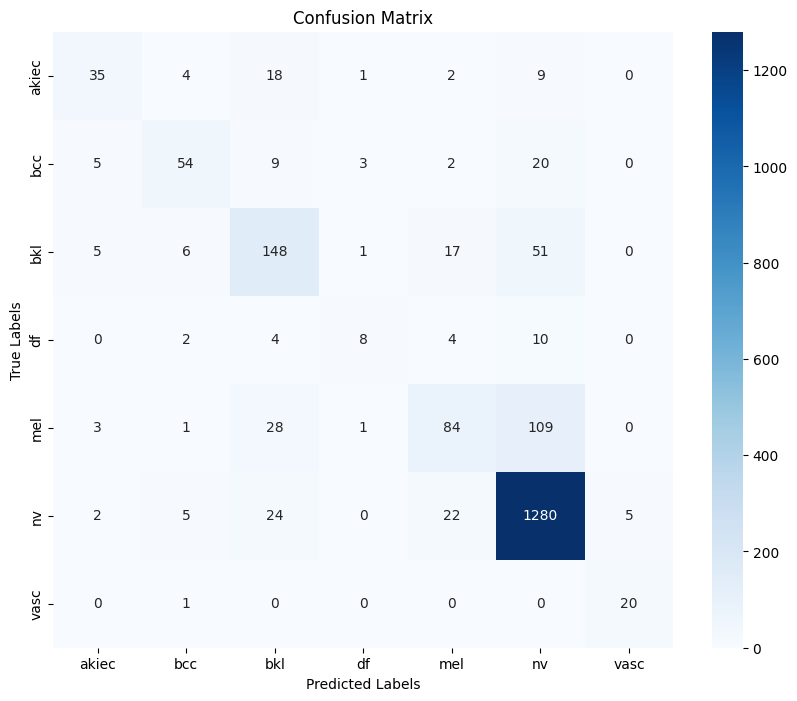

In [16]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import jaccard_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score


accuracy = accuracy_score(y_test_labels, y_pred_labels)
print('Accuracy:', accuracy)

# Compute precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print('Precision:', precision)

# Compute recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print('Recall:', recall)

# Compute F1 score
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print('F1 score:', f1)

# Compute Jaccard coefficient
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
print('Jaccard coefficient:', jaccard)

# Compute Dice coefficient
dice = 2 * (precision * recall) / (precision + recall)
print('Dice coefficient:', dice)

Accuracy: 0.8132800798801797
Precision: 0.7982326887640018
Recall: 0.8132800798801797
F1 score: 0.7984719215790995
Jaccard coefficient: 0.6932830740142506
Dice coefficient: 0.8056861323253927
